<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/IonQ_%EC%96%91%EC%9E%90%ED%8A%B9%EC%84%B1%ED%99%94_%EB%B0%8F_%EB%B3%BC%EB%A5%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-ionq
!pip install qiskit-aer
!pip install matplotlib
!pip install pylatexenc

In [ ]:
#imports
from qiskit_ionq import IonQProvider
import numpy as np
import configparser
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.extensions import UnitaryGate

In [ ]:
ionq_provider = IonQProvider(token="xdNnUQmVTZyZ8ox7pHvPuU6qY5te9K8c")

In [ ]:
ionq_provider.backends()

In [ ]:
swap_gate = QuantumCircuit(2)

swap_gate.cx(0, 1)
swap_gate.cx(1, 0)
swap_gate.cs(0, 1)
swap_gate.draw()

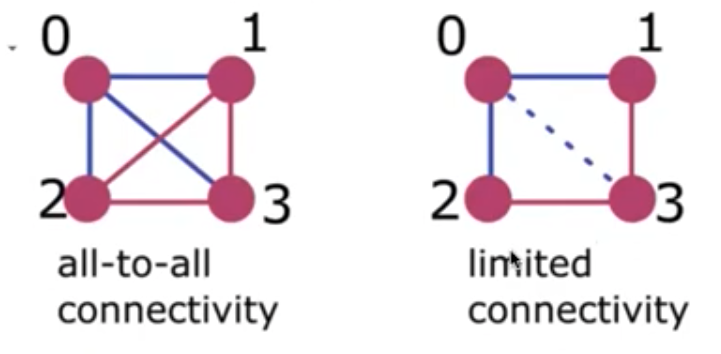

In [ ]:
def add_A_layer(circuit, size=4):
  for i in range(size):
    circuit.rz(np.random.randn() * np.pi, i)
    circuit.rx(np.random.randn() * np.pi, i)
    circuit.rz(np.random.randn() * np.pi, i)
  ###for
  return
###def

def add_B_layer(circuit, size=4):
  for i in range(1, size):
    circuit.cx(0, 1)
    circuit.rz(np.random.randn() * np.pi, i)
    circuit.cx(0, i)
  ###for
  return
###def

def add_B_layer_limited_connectivity(circuit, size=4):
  for i in range(1, size - 1):
    circuit.cx(0, i)
    circuit.rz(np.random.randn() * np.pi, i)
    circuit.cx(0, 1)
  ###for
  circuit.cx(2, 3)
  circuit.cx(3, 2)
  circuit.cx(2, 3)
  circuit.cx(0, 2)
  circuit.rz(np.random.randn() * np.pi, 2)
  circuit.cx(0, 2)
  circuit.cx(2, 3)
  circuit.cx(3, 2)
  circuit.cx(2, 3)
  return
###def

Full Connectivity

In [ ]:
np.random.seed(0)
training_circuit = QuantumCircuit(4)
add_A_layer(training_circuit)
add_B_layer(training_circuit)
add_A_layer(training_circuit)
add_B_layer(training_circuit)
training_circuit.measure_all()
training_circuit.draw(output='mpl')

In [ ]:
np.random.seed(0)
training_circuit_limited_connectivity = QuantumCircuit(4)
add_A_layer(training_circuit_limited_connectivity)
add_B_layer_limited_connectivity(training_circuit_limited_connectivity)
add_A_layer(training_circuit_limited_connectivity)
add_B_layer_limited_connectivity(training_circuit_limited_connectivity)
training_circuit_limited_connectivity.measure_all()
training_circuit_limited_connectivity.draw(output='mpl')

**Simulate the depth 2 circuit on the simulator**

In [ ]:
# choose your backend
backend = ionq_provider.get_backend("ionq_simulator")

np.random.seed(4)
training_circuit = QuantumCircuit(4)

add_A_layer(training_circuit)
add_B_layer(training_circuit)
add_A_layer(training_circuit)
add_B_layer(training_circuit)

training_circuit.measure_all()
job = backend.run(training_circuit, shots=5000)
result = job.result() # Get result object
counts = result.get_counts() # Get counts dictionary

plot_histogram(counts)

#fig = plot_histogram(counts) # Plot the histogram of the counts
#ax = fig.axes[0]
#ax.set_ylim(0, 0.5)
#fig

Find the Heavy Outputs

In [ ]:
sorted_counts =  np.zeros(16)
heavy_outs =  np.zeros(16)
heavy_weight = 0
heavy_list = list()

# A list of tuples of counts, sorted by count value
sorted_dict = sorted(counts.items(), key = lambda kv: kv[1])
for i in range(len(counts)):
  sorted_counts[i] += sorted_dict[len(counts) - i - 1][1] / 5000
  heavy_outs[i] = sorted_dict[len(counts) - i - 1][1] / 5000
  #prob_bin[int(sorted_dict[len(counts) - i - 1][1] / 5000 * 20)] += 1
###for

for i in range(16):
  if(heavy_outs[i] > np.median(heavy_outs)):
    heavy_weight += heavy_outs[i] / (1.0)
    print(sorted_dict[len(counts)-i-1][0])
    heavy_list.append(sorted_dict[len(counts)-i-1][0])
  ###if
###for

print("heavy weights = ", heavy_weight)

In [ ]:
heavy_count = 0;
for i in heavy_list:
  if counts.get(i) is not None:
    heavy_count += counts.get(i) / 100
  ###if
###for

print('weight on heavy outputs = ', heavy_count)

In [ ]:
# choose your backend
backend = ionq_provider.get_backend("ionq_qpu")

np.random.seed(4)
training_circuit = QuantumCircuit(4)

add_A_layer(training_circuit)
add_B_layer(training_circuit)
add_A_layer(training_circuit)
add_B_layer(training_circuit)

training_circuit.measure_all()
job = backend.run(training_circuit, shots=5000)
result = job.result() # Get result object
counts = result.get_counts() # Get counts dictionary

plot_histogram(counts)

#fig = plot_histogram(counts) # Plot the histogram of the counts
#ax = fig.axes[0]
#ax.set_ylim(0, 0.5)
#fig

In [ ]:
sorted_counts =  np.zeros(16)
heavy_outs =  np.zeros(16)
heavy_weight = 0
heavy_list = list()

# A list of tuples of counts, sorted by count value
sorted_dict = sorted(counts.items(), key = lambda kv: kv[1])
for i in range(len(counts)):
  sorted_counts[i] += sorted_dict[len(counts) - i - 1][1] / 5000
  heavy_outs[i] = sorted_dict[len(counts) - i - 1][1] / 5000
  #prob_bin[int(sorted_dict[len(counts) - i - 1][1] / 5000 * 20)] += 1
###for

for i in range(16):
  if(heavy_outs[i] > np.median(heavy_outs)):
    heavy_weight += heavy_outs[i] / (1.0)
    print(sorted_dict[len(counts)-i-1][0])
    heavy_list.append(sorted_dict[len(counts)-i-1][0])
  ###if
###for

print("heavy weights = ", heavy_weight)